In [36]:
import librosa as lb
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from librosa.display import specshow, waveplot
from pydub import AudioSegment
np.random.seed(9) #For the Mighty Nein!

# Phase 1 - Problem Definition

## 1.1 Broad Goals

A Speech Emotion Recognition model allows a program to correctly identify the emotional state of a speaker.



## 1.2 Data Source

The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) includes 24 professional voice actors, 12 male, 12 female speaking the same two lines.  The full dataset includes both audio and visual files.  

### Spoken Files
| Actor |  Emotion | Intensity      | Statement | Repetition |
| :---: |:--------:| :-------------:| :--------:| :--------: |
| 01- 24| calm     | normal, strong | 01, 02    |  01, 02    |
| 01- 24| happy    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| sad      | normal, strong | 01, 02    |  01, 02    |
| 01- 24| angry    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| fearful  | normal, strong | 01, 02    |  01, 02    |
| 01- 24| surprise | normal, strong | 01, 02    |  01, 02    |
| 01- 24| disgust  | normal, strong | 01, 02    |  01, 02    |
| 01- 24| neutral  | normal         | 01, 02    |  01, 02    |

Statement 01:  "Kids are talking by the door"

Statement 02:  "Dogs are sitting by the door"

Intensity 01:  "Normal"

Intensity 02:  "Strong"

### Song Files
| Actor |  Emotion | Intensity      | Statement | Repetition |
| :---: |:--------:| :-------------:| :--------:| :--------: |
| 01- 24| calm     | normal, strong | 01, 02    |  01, 02    |
| 01- 24| happy    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| sad      | normal, strong | 01, 02    |  01, 02    |
| 01- 24| angry    | normal, strong | 01, 02    |  01, 02    |
| 01- 24| fearful  | normal, strong | 01, 02    |  01, 02    |




Full Dataset available at:
https://smartlaboratory.org/ravdess/


For the purposes of this project we will be examining the audio-only files.

## 1.3 Problem Statement

    How accurately can the model predict the emotion of the speaker?  Does the model lose or gain accuracy when the statement is spoken or sung?

# Phase 2:  Data Gathering

## 2.1 define functions to parse sound files


In [28]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(lb.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(lb.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma2=np.mean(lb.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma2))
        if mel:
            mel=np.mean(lb.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result


## 2.1 load data

In [3]:
emotions = {
    '01' : 'neutral',
    '02' : 'calm',
    '03' : 'happy',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fearful',
    '07' : 'disgust',
    '08' : 'surprised'
}

In [4]:
vocal_channels = {
    '01' : 'speech',
    '02' : 'song'
}

In [5]:
emotional_intensities = {
    '01' : 'normal',
    '02' : 'strong'
}

In [6]:
statements = {
    '01' : 'Kids are talking by the door',
    '02' : 'Dogs are sitting by the door'
}

In [12]:
def load_data():
    features = []
    for file in glob.glob('./data/samples/*.wav'):
        file_name = os.path.basename(file)
        feature_dict = {
            'file_name' : file_name[:-4],
            'channel' : vocal_channels[file_name.split('-')[1]],
            'emotion' : emotions[file_name.split("-")[2]],
            'intensity' : emotional_intensities[file_name.split("-")[3]],
            'statement' : statements[file_name.split('-')[4]],
            'repetition' : file_name.split('-')[5],
            'actor' : file_name.split('-')[6][:-4],
            'feature' : extract_feature(file, mfcc= True, chroma = True, mel = True) }
        features.append(feature_dict)
        print(F"now loading {file_name}")
    return pd.DataFrame.from_dict(features)

In [13]:
s_df = load_data()

-03-02-01-02-06.wav
now loading 03-02-05-01-01-01-06.wav
now loading 03-02-06-01-01-02-12.wav
now loading 03-02-02-01-01-01-16.wav
now loading 03-02-01-01-01-02-02.wav
now loading 03-01-04-02-01-02-16.wav
now loading 03-01-07-02-01-01-02.wav
now loading 03-01-04-02-01-02-02.wav
now loading 03-01-07-02-01-01-16.wav
now loading 03-02-02-01-01-01-02.wav
now loading 03-02-01-01-01-02-16.wav
now loading 03-02-02-02-02-01-02.wav
now loading 03-01-04-01-02-02-02.wav
now loading 03-01-07-01-02-01-16.wav
now loading 03-01-04-01-02-02-16.wav
now loading 03-01-07-01-02-01-02.wav
now loading 03-02-02-02-02-01-16.wav
now loading 03-02-05-02-02-01-06.wav
now loading 03-02-06-02-02-02-12.wav
now loading 03-01-03-01-02-02-06.wav
now loading 03-01-03-01-02-02-12.wav
now loading 03-02-05-02-02-01-12.wav
now loading 03-02-06-02-02-02-06.wav
now loading 03-02-02-01-02-01-22.wav
now loading 03-01-04-02-02-02-22.wav
now loading 03-01-07-02-02-01-22.wav
now loading 03-02-01-01-02-02-22.wav
now loading 03-01-

In [16]:
s_df = s_df.set_index('file_name')

In [18]:
s_df

,channel,emotion,intensity,statement,repetition,actor,feature
file_name,,,,,,,
03-01-06-01-02-02-02,speech,fearful,normal,Dogs are sitting by the door,02,02,"[-590.861572265625, 50.68805694580078, -24.538..."
03-01-05-01-02-01-16,speech,angry,normal,Dogs are sitting by the door,01,16,"[-563.286376953125, 49.64911651611328, -6.1054..."
03-02-03-02-02-02-16,song,happy,strong,Dogs are sitting by the door,02,16,"[-552.8955688476562, 57.31650924682617, -18.98..."
03-01-08-01-01-01-14,speech,surprised,normal,Kids are talking by the door,01,14,"[-710.7835693359375, 48.772247314453125, -2.86..."
03-02-03-02-02-02-02,song,happy,strong,Dogs are sitting by the door,02,02,"[-532.0457763671875, 59.02028274536133, -40.61..."
...,...,...,...,...,...,...,...
03-01-02-02-01-01-23,speech,calm,strong,Kids are talking by the door,01,23,"[-692.979248046875, 79.81969451904297, 5.41380..."
03-01-02-01-02-01-23,speech,calm,normal,Dogs are sitting by the door,01,23,"[-689.0542602539062, 66.57259368896484, 3.8226..."
03-02-04-02-02-02-23,song,sad,strong,Dogs are sitting by the door,02,23,"[-592.8164672851562, 99.78511047363281, -2.307..."


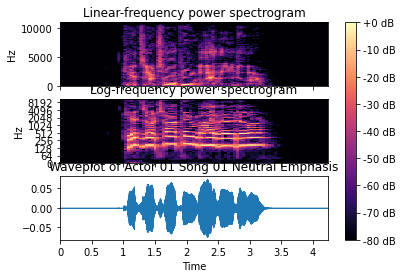

In [63]:
y, sr = lb.load('./data/Audio_Song_Actors_01-24/Actor_01/03-02-01-01-01-01-01.wav')
fig, ax = plt.subplots(nrows = 3, ncols = 1, sharex = True)
D = lb.amplitude_to_db(np.abs(lb.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

lb.display.waveplot(y, sr)
ax[2].set(title='Waveplot of Actor 01 Song 01 Neutral Emphasis');

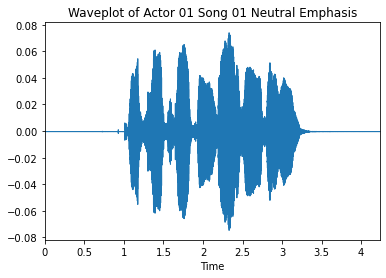

In [56]:
lb.display.waveplot(y, sr)
plt.title('Waveplot of Actor 01 Song 01 Neutral Emphasis');

In [57]:
lb.display.specshow(y)

IndexError: tuple index out of range

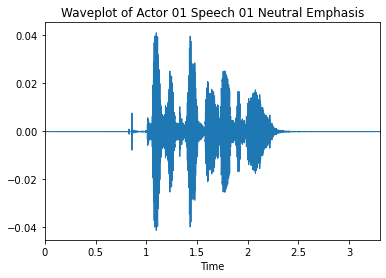

In [52]:
y, sr = lb.load('data/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')
lb.display.waveplot(y, sr)
plt.title('Waveplot of Actor 01 Speech 01 Neutral Emphasis');

# Phase 3 - Exploratory Data Analysis

## 3.1 Sampling Rates

## 3.2 MFCC

## 3.3 Chroma

## 3.4 MEL